# Receptor Blocking Petrubation Analysis Tutorial

This tutorial provides a brief guide on performing CellAgentChat's receptor blocking analysis. CellAgentChat's deep learning model is used to estimate the impact of blocking a receptor on the downstream gene expression. This identifies the top most perturbed genes (target genes) from receptor blocking. This is visualized by a bar plot which shows the degree of perturbation of the target genes and a matrix plot which shows the expression of each target gene across the cell type populations. If many perturbed genes are linked with the disease of interest, this may indicate the receptor blocked is a potential therapeutic target. 

### Load Packages

In [1]:
from preprocessor import *
from trajectory import *
import model_setup
from model_setup import *
import scanpy as sc
import permutations
from permutations import *
import Communication
from Communication import *
import abm
from abm import *

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


For instructions of how to perform data input, processing and initialization as well as model setup prior to running our receptor blocking analysis, please look at our full tutorial.

## Receptor Blocking Perturbation Analysis

We provide a function ```CCI``` calculate cell-cell interactions. 

Optional Parameters:

```delta```: Influences the degree of cell-to-cell distance. For long-range mode, a delta value less than 1 is used. This promotes interactions over long distance ranges. While for short-range mode, a delta value greater than 1 is employed, promoting interactions over closer distance ranges [1].

```max_steps```: Number of iterations to be performed in the simulation [1]. 

```tau```: The degree of the freedom for the distance [2].

```noise```: Percentage of gaussian noise applied to the ligand diffusion rate at each step [5]

```rec_block```: Receptor to be obstructed by in-silico receptor blocking. Interactions involving the chosen receptor will not occur [False].

```plot_every_step```: Whether to plot results after every step [True].

```path```: output path/directory [/out].

```interaction_matrix```: Name of the interaction_matrix results file [interaction_matrix.csv].

```sig_lr_pair```: Name of the file consisting of all the inferred cell-cell communications at the level of ligands/receptors [sig_lr_pair.csv].

```pvalues_name```: Name of the file consisting of the pvalues for the interactions that correspond to the ```sig_lr_pair``` file [pvalues.csv]. 

```pvalues2_names```: Name of the file consisting of the pvalue group (0.05 < p < 0.025, 0.025< p < 0.01, p < 0.01) for the interactions that correspond to the ```sig_lr_pair``` file [pvalues2.csv]. 

```cluster_name```: Name of the file that stores the list of cell types(for plotting) [cluster_names.csv].

```threshold```: The pvalue threshold for significant interactions [0.05]

Here we run the ```CCI``` function adding in the ```rec_block``` parameter to block the receptor CD44. Inference of CCI will occur with the exclusion of interactions involving the receptor CD44. Following CCI inference, CellAgentChat's receptor blocking analysis will determine the top 50 most perturbed downstream genes. 

Calculating Interactions
Step: 0
Average Distance: 17.09968921592907
Blocked Receptor Analysis
Get original
Getting Target Genes for receptor: CD44
Plotting results for receptor: CD44


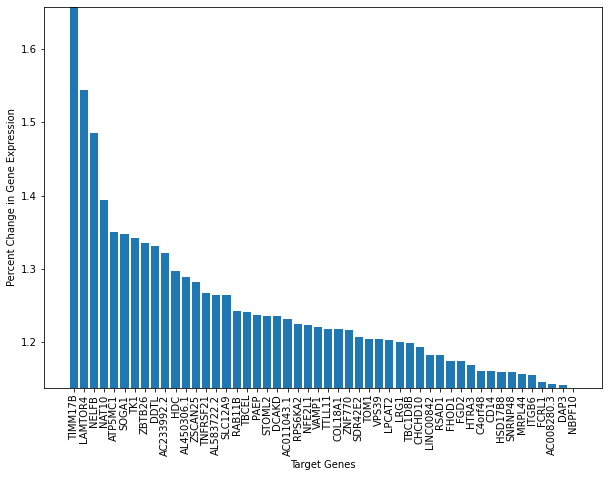

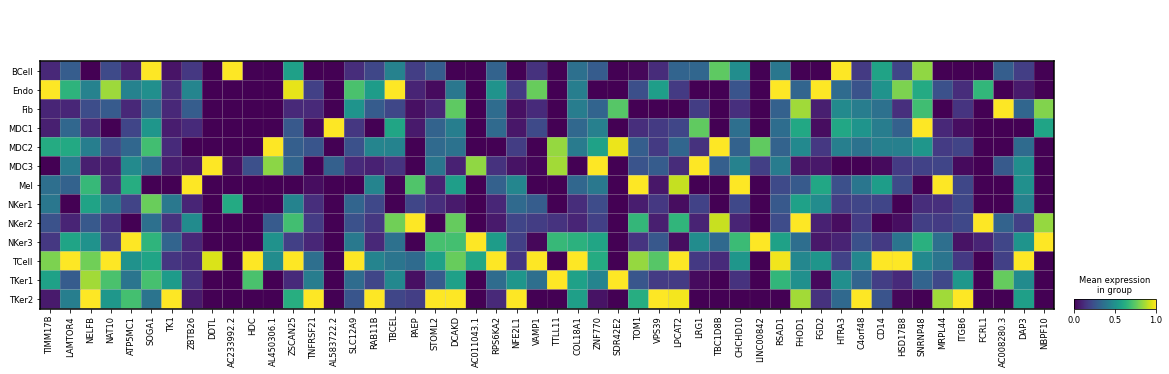

plots saved to directory /figures
Calculating Significant Interactions
8861 significant interactions
Percentage of significant interactions: 3.9310938387279957
Saving Files
Saved files
Plotting results
null device 
          1 


Warning message:
Using size for a discrete variable is not advised. 


In [9]:
CCI(N=len(adata.obs), adata=adata, lig_uni=lig_uni, rec_uni=rec_uni, 
    rates=rates, distribution=params, clusters=clusters, dist=True, 
    rec_block='CD44')

Here the receptor blocking analysis outputs the most perturbed downstreams genes (target genes) when CD44 is blocked. This is displayed using a bar graph to illustrate the degree to which the target genes are affected and a matrix plot to visualize the expression of the target genes across the various cell type populations.

### Receptor Blocking Analysis without CCI Inferece

Optionally, the receptor blocking analysis can be done without calculating CCI inference by calling the ```block_receptor``` function. 

Parameters:
    
```adata```: Anndata object containing the required agent states for CellAgentChat.
    
```receptors```: A list containing the receptors to be blocked. 
    
```rec_uni```: The receptor universe.
    
```threshold```: The number of 'target genes' to obtain [50].

Blocked Receptor Analysis
Get original
Getting Target Genes for receptor: CD44
Plotting results for receptor: CD44


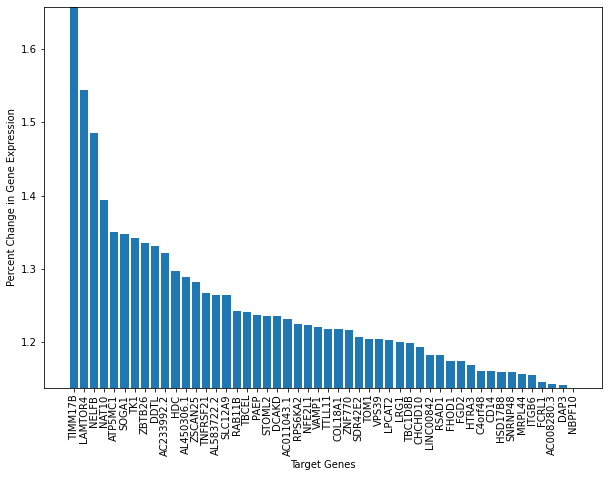

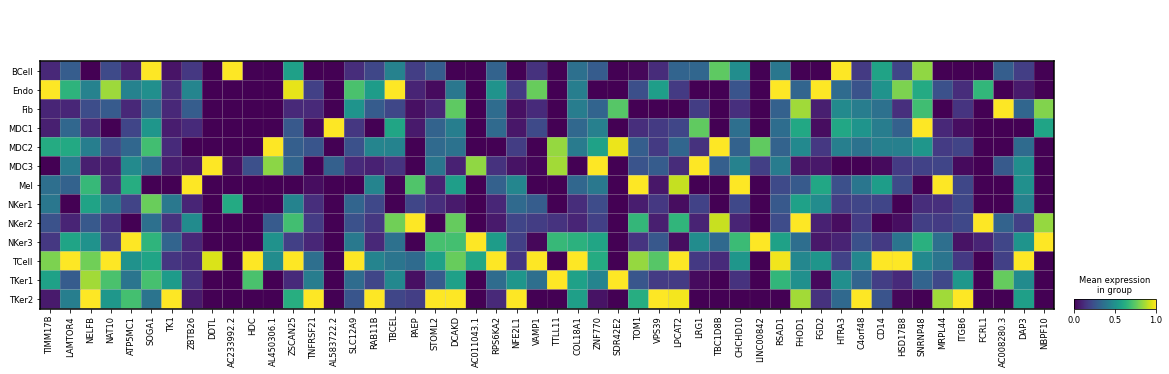

plots saved to directory /figures


In [10]:
rec_to_block = ['CD44']
block_receptors(adata=adata, receptors = rec_to_block, rec_uni=rec_uni, 
                threshold=50)

We can even choose to perform the receptor blocking analysis for multiple receptors simultaneously.

Blocked Receptor Analysis
Get original
Getting Target Genes for receptor: CD44
Getting Target Genes for receptor: CANX
Getting Target Genes for receptor: ITGA3
Plotting results for receptor: CD44


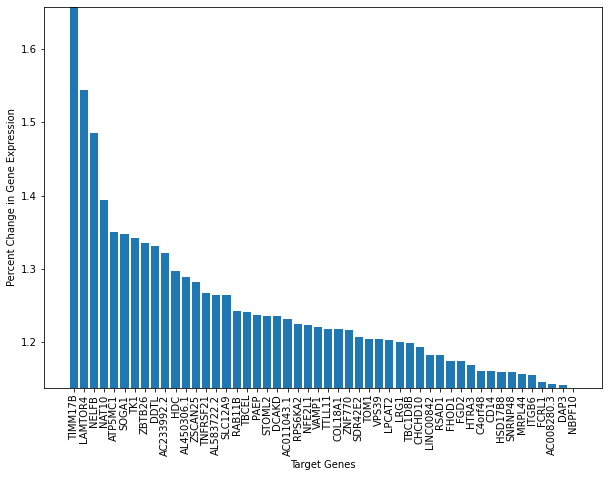

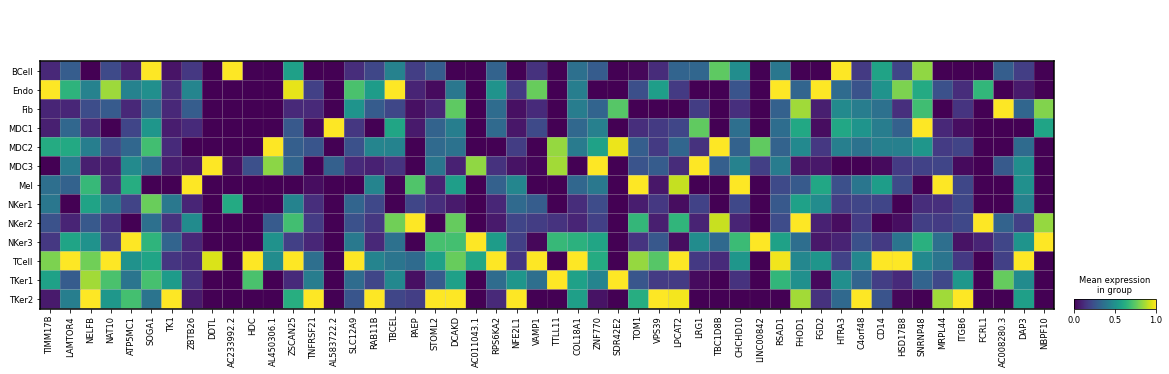

Plotting results for receptor: CANX


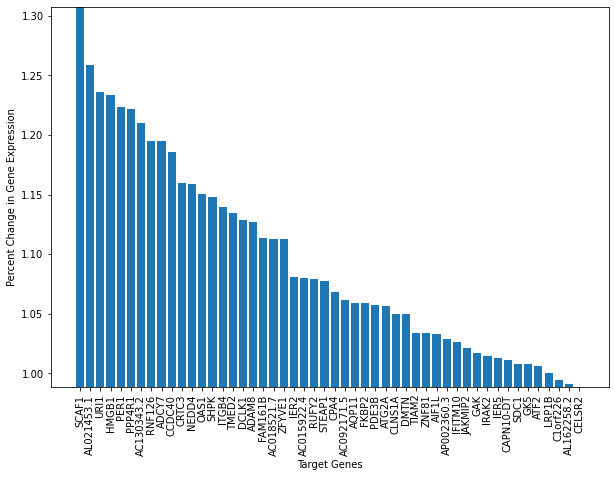

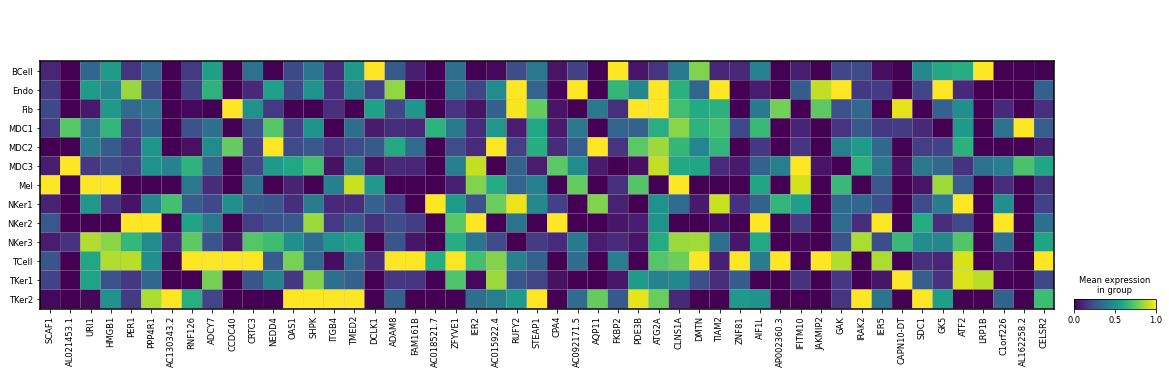

Plotting results for receptor: ITGA3


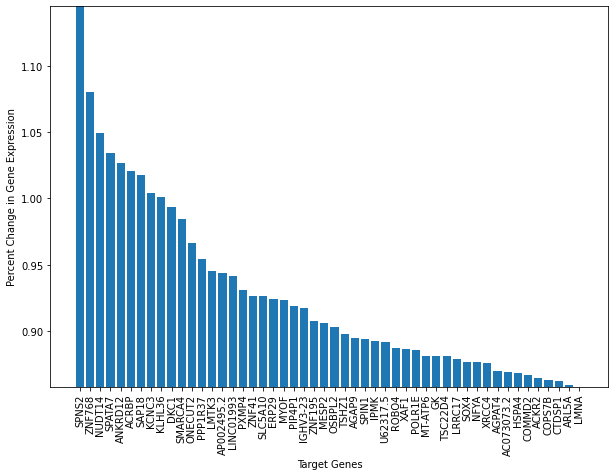

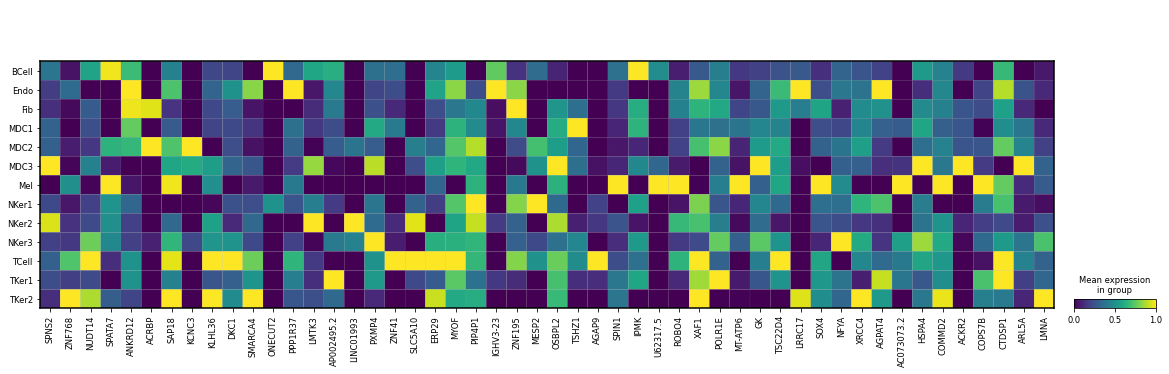

plots saved to directory /figures


In [11]:
rec_to_block = ['CD44', 'CANX', 'ITGA3']
block_receptors(adata=adata, receptors = rec_to_block, rec_uni=rec_uni, 
                threshold=50)

All result files and plots saved in the ```figures``` directory. 

Using the list of target genes, we can check to see if any of them are associated with the disease of interest using external tools. If many target genes are linked with the disease of interest, this may indicate the receptor blocked is a potential therapeutic target. 